In [24]:
import torch  
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import time

"Using Cuda" if torch.cuda.is_available() else "Not using Cuda"

'Using Cuda'

# Tensors 

In [25]:
numpy_x = np.linspace(0, 10, 5)
torch_x = torch.linspace(0, 10, 5)

numpy_x, type(numpy_x)
torch_x, type(torch_x)

(tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000]), torch.Tensor)

In [26]:
# reshape
numpy_a = np.arange(12).reshape(2,3,2)
torch_a = torch.arange(12).reshape(2,3,2)

numpy_a, type(numpy_a)
torch_a, type(torch_a)

(tensor([[[ 0,  1],
          [ 2,  3],
          [ 4,  5]],
 
         [[ 6,  7],
          [ 8,  9],
          [10, 11]]]),
 torch.Tensor)

### Broadcasting Rules

In [27]:
v1 = torch.tensor([2,1,4])
v2 = torch.tensor([2,4,1])
v1 * v2 # element-wise multiplication

tensor([4, 4, 4])

In [28]:
m1 = np.ones((1,6,4,1,7,2))
m2 = np.ones((5,6,1,3,1,2))
m1 * m2

array([[[[[[1., 1.],
           [1., 1.],
           [1., 1.],
           ...,
           [1., 1.],
           [1., 1.],
           [1., 1.]],

          [[1., 1.],
           [1., 1.],
           [1., 1.],
           ...,
           [1., 1.],
           [1., 1.],
           [1., 1.]],

          [[1., 1.],
           [1., 1.],
           [1., 1.],
           ...,
           [1., 1.],
           [1., 1.],
           [1., 1.]]],


         [[[1., 1.],
           [1., 1.],
           [1., 1.],
           ...,
           [1., 1.],
           [1., 1.],
           [1., 1.]],

          [[1., 1.],
           [1., 1.],
           [1., 1.],
           ...,
           [1., 1.],
           [1., 1.],
           [1., 1.]],

          [[1., 1.],
           [1., 1.],
           [1., 1.],
           ...,
           [1., 1.],
           [1., 1.],
           [1., 1.]]],


         [[[1., 1.],
           [1., 1.],
           [1., 1.],
           ...,
           [1., 1.],
           [1., 1.],
           

to check if we can multiply two matrices, we check right to left of the shape of the matrices to see if 
1. They are equal 
2. One of them is 1
```
m1's shape = 1 6 4 1 7 2
m2's shape = 5 6 1 3 1 2
```

hence it should be clear m1 and m2 are compatible. 
(why? imagine removing all the cols where one of the numbers is 1, and now remove all the cols where they are equal, there should be no cols left if they are compatible)  

In [29]:
m1 = np.array([[6,5],[4,7],[2,3]])
m2 = np.array([2,2])
m1 * m2


array([[12, 10],
       [ 8, 14],
       [ 4,  6]])

Reshape works like this

In [30]:
m1.reshape(2,3)

array([[6, 5, 4],
       [7, 2, 3]])

#### Example 
lets say you want to scale the RGB channels of a 16 x 16 image, you want scale red by $\frac{1}{2}$, green by $\frac{3}{2}$ and blue by $\frac{1}{3}$.

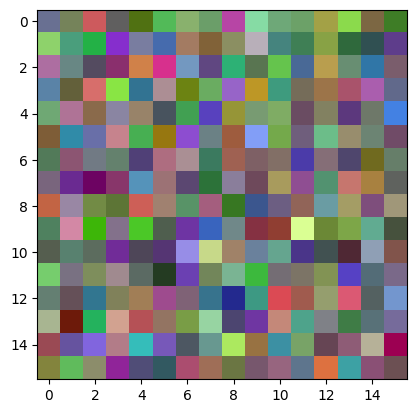

In [31]:
image = torch.randn((16,16,3)) 
image = (image - image.min()) / (image.max() - image.min()) # normalize
# Convert the PyTorch tensor to a NumPy array

# Plot the original image
plt.imshow(image.numpy())
plt.show()

In [32]:
# new image
color_scalar = np.array([1/2, 3/2, 1/3])


Or if we want to separate the channels 

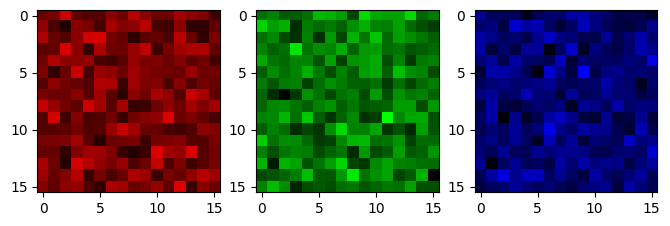

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(8, 4))

axes[0].imshow((image * np.array([1, 0, 0])).numpy())
axes[1].imshow((image * np.array([0, 1, 0])).numpy())
axes[2].imshow((image * np.array([0, 0, 1])).numpy())

plt.show()

Lets say we have multiple images and we only want certain color channels on certain images. So we lets say we the first to be only red and second to be only green. 

In [34]:
num_images = 2
images = torch.randn((num_images,16,16,3)) # 2 x 16 x 16 x 3
images = (images - images.min()) / (images.max() - images.min()) # normalize

scales = torch.tensor([1,0,0,0,1,0]) # 2 x 1 x 1 x 3
scales = scales.reshape((num_images,1,1,3))

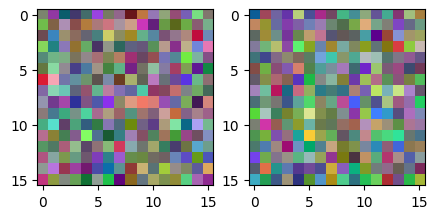

In [35]:
# Show the original images
fig, axes = plt.subplots(1, num_images, figsize=(5, 4))
for i in range(num_images):
    axes[i].imshow(images[i].numpy())

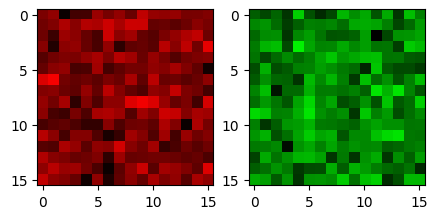

In [36]:
# Show the images after scaling
fig, axes = plt.subplots(1, num_images, figsize=(5, 4))
for i in range(num_images):
    axes[i].imshow((images[i] * scales[i]).numpy())

Taking means across spaces

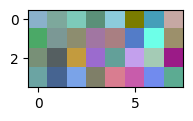

In [37]:
image = torch.randn((4,8,3))
image = (image - image.min()) / (image.max() - image.min()) # normalize

fig, axes = plt.subplots(1, 1, figsize=(2, 2))
axes.imshow(image.numpy())
plt.show()

In [38]:
mean = torch.mean(image, axis=0) # the mean has shape 8,3 because we averaged over the first axis
mean # this is mean rgb vector for each column (because we went over the rows)

tensor([[0.4325, 0.6440, 0.5780],
        [0.3968, 0.5071, 0.5394],
        [0.5734, 0.6494, 0.5804],
        [0.5257, 0.4886, 0.5833],
        [0.6157, 0.6050, 0.6354],
        [0.5899, 0.4924, 0.5979],
        [0.4483, 0.7427, 0.8213],
        [0.5911, 0.5015, 0.5418]])

In [39]:
mean = torch.mean(image,axis=-1) # take mean of the rgb vector (per all higher dims i.e. width, height, image no. etc...)
mean # this is the mean for each pixel (sort of like mean brightness)

tensor([[0.6783, 0.5898, 0.6708, 0.4671, 0.7370, 0.3227, 0.5429, 0.6937],
        [0.4551, 0.5557, 0.5159, 0.5778, 0.5593, 0.5344, 0.7800, 0.5330],
        [0.5031, 0.3654, 0.5401, 0.6152, 0.5406, 0.7763, 0.7181, 0.4162],
        [0.5696, 0.4135, 0.6774, 0.4701, 0.6380, 0.6068, 0.6421, 0.5365]])

Taking max-es and min color channel values (and getting their corresponding indices) 
- this is done quite commonly in image segmentation models 
- i.e. what pixels are tumour in a ct scan

In [40]:
values, indices = torch.max(image, axis=-1) 
indices # so this tells us which color channel is the max for each pixel

tensor([[2, 1, 1, 1, 2, 1, 2, 0],
        [1, 1, 0, 2, 0, 2, 1, 0],
        [1, 2, 0, 2, 1, 2, 1, 0],
        [1, 2, 2, 0, 0, 0, 2, 1]])

Storing gradients

$$y=\sum\limits^{n}_{i=1}\ln(x^4)_i$$

has gradient 

$$\dfrac{dy}{dx}=[\dfrac{\partial y}{\partial x_1},\ldots,\dfrac{\partial y}{\partial x_n}]^T$$

where the derivative is 

$$\dfrac{\partial y}{\partial x_i} =\dfrac{4x^3_i}{x_i^4}=\dfrac{4}{x_i}$$

With torch it will do this automatically (using analytical methods of-course)

In [41]:
from math import exp 
x = torch.tensor([[exp(1),exp(3)],[exp(2),exp(4)]], requires_grad=True) # = tensor [[e, e^3], [e^2, e^4]]
y = x.pow(4).log().sum() # this will record the computation graph
y

tensor(40., grad_fn=<SumBackward0>)

When we call `y.backwards()` we calculate the gradient of x by using analytical methods to figure out what the gradient is given what we did to it. 

In [42]:
y.backward() 
x.grad # dy/dx

tensor([[1.4715, 0.1991],
        [0.5413, 0.0733]])

Notice this is the exact same as if we had applied the symbolic $\frac{dy}{dx}$ for $y=\ln(x^4)$ which is $\dfrac{4}{x}$

In [43]:
x.pow(-1).multiply(4) # dy/dx = 4 / x

tensor([[1.4715, 0.1991],
        [0.5413, 0.0733]], grad_fn=<MulBackward0>)

Speed comparison 

In [44]:
# numpy
mat_a = np.random.rand(5000,5000)
mat_b = np.random.rand(5000,5000)
t1 = time.time()
np.matmul(mat_a, mat_b)
t2 = time.time()
t2 - t1

1.3468692302703857

In [45]:
# pytorch 
mat_a = torch.rand((5000,5000))
mat_b = torch.rand((5000,5000))
t1 = time.time()
torch.matmul(mat_a, mat_b)  
t2 = time.time()
t2 - t1

0.6872749328613281